# Machine Learning Library Projects

This notebook is a reference for myself when conducting machine learning algorithms on datasets. The following machine learning methodologies will be looked at in this notebook:
- K Nearest Neighbours
- Decision Trees and Random Forests
- Support Vector Machines
- K Means Clustering
- Natural Language Processing

## K Nearest Neigbours

### Info

KNN is a classification algorithm that works by calculating the distance from x to all points in your data. The points are then sorted by increasing distance from x. The classification of x is then predicted based on the majority of the "k" closest points. For example, if you had data for heights and weights of horses and dogs and you have a new data point, you decide to pick the k=5 closest points and 3 of those 5 are horses...the algorithm will predict the new data point is a horse.

A generic example of KNN algorithm is shown below:

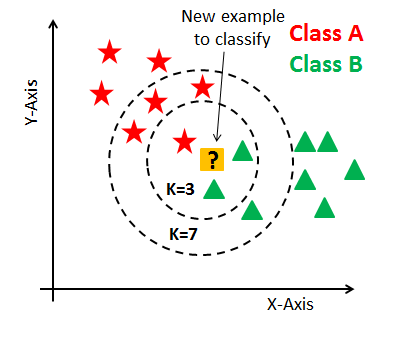

Pros:
- Very simple
- Training is trivial
- Works with any number of classes
- Easy to add more data
- Few parameters (K & Distance metric)

Cons:
- High prediction cost (worse for large datasets)
- Not good with high dimensional data
- Categorical features don't work well

### Project - Import Libraries and Data

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# import the data and save into a dataframe called df
df = pd.read_csv("KNN_Project_Data")
print(df.shape)
df.head()

### Project - Exploratory Data Analysis

In [ ]:
# create a pairplot using seaborn with the hue set to the target class
sns.pairplot(data=df, hue='TARGET CLASS')

### Project - Train Test Split and Standardise Features

In [ ]:
# separate the features and the target class to prepare for train test split
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

In [ ]:
# split the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# instantiate StandardScaler
# fit the scaler using the training data
# transform both the training and testing features
knn_scaler = StandardScaler()
knn_scaler.fit(x_train)
x_train = knn_scaler.transform(x_train)
x_test = knn_scaler.transform(x_test)

### Project - Create KNN Model

In [ ]:
# create an instance of KNeighborsClassifier
# use an initial k value of 2
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
# train the model on the scaled training features and training target label
knn.fit(x_train, y_train)

In [ ]:
# make predictions
yhat = knn.predict(x_test)

### Project - Evaluate KNN Model

In [ ]:
# evaluate model with a confusion matrix and a classification report
print(confusion_matrix(y_test, yhat))
print('\n')
print(classification_report(y_test, yhat))

### Project - Finding Optimum K Value

Finding the optimum K value by creating a for loop and looking at the error rate during each iteration.

In [ ]:
# create a for loop for different values of K
# measure the error rate for each iteration
k_values = range(1,51)
error_rate = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    k_yhat = knn.predict(x_test)
    k_error_rate = np.mean(k_yhat != y_test)
    error_rate.append(k_error_rate)

In [ ]:
# store the results in a dataframe
df_k = pd.DataFrame({'Error':error_rate}, index=k_values)
df_k.head()

In [ ]:
# visualise the error rate against k values
df_k.plot(figsize=[18,6], linestyle='dashed', color='green', marker='o', markerfacecolor='red', grid=True)

In [ ]:
# if the graph is inclear we can check with looking at the minimum values in the dataframe
df_k.index[df_k['Error']==df_k['Error'].min()][0]

Here we can see that the minimum error rate is with a k value of 7. Hence we will retrain the model with k=7.

### Project - Retrain Model with Optimum K Value and Evaluate

In [ ]:
# retrain the model with optimum k=7
# create predictions
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
yhat = knn.predict(x_test)

In [ ]:
# evaluate the model with optimum k value
print(confusion_matrix(y_test, yhat))
print('\n')
print(classification_report(y_test, yhat))

By finding the optimum k value we have significantly increased the accuracy of the model.

## Decision Trees and Random Forests

### Info

Decision Trees are a non-parametric supervised learning method used for both classification and regression.

Decision trees consist of:
- Root Nodes: The node that performs the first split
- Edges: The outcome fo a split to the next nodes
- Leaves: The nodes at the end which give the output

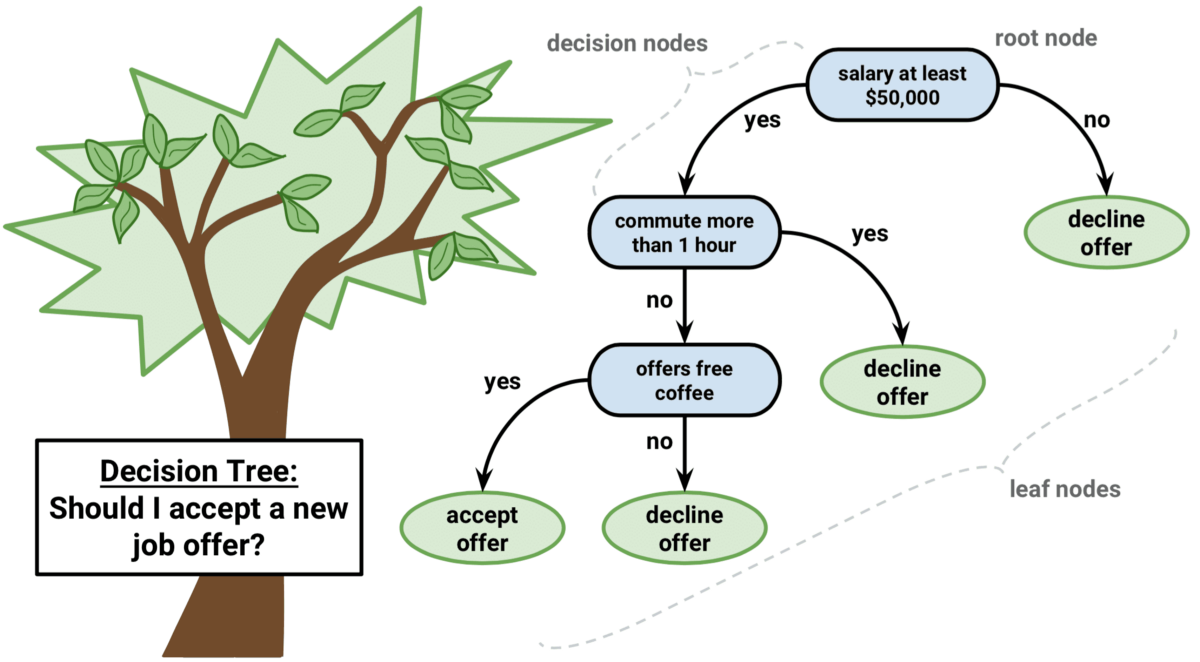

The primary issue with decision trees is that they do not have the best predictive accuracy. Random Forests help to improve the performance of a single decision tree by creating many decision trees each with a random sample of features chosen as the split. This means that the structure of the decision tree changes each time it is recreated; furthermore, the output is generated via a voting method. For example, if there were 10 decision trees and 7 gave output class 1 and 3 gave output class 3 then the output would be 1 by voting majority.

An infographic is shown below:

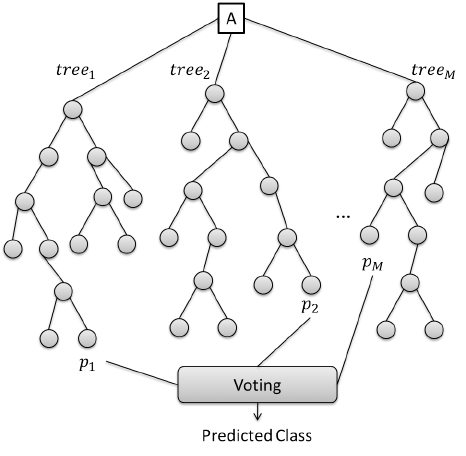

### Project - Import Libraries and Data

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# import the data and store in a dataframe df
loans = pd.read_csv('RF&DT_Project_Data.csv')
loans.head()

### Project - Exploratory Data Analysis

In [ ]:
loans['credit.policy'].value_counts(dropna=False)

In [ ]:
# create a histogram of the FICO credit score of the borrower
# break this down by whether the borrow meets the credit criteria of the company
plt.figure(figsize=[15,8])
sns.histplot(data=loans, x='fico', hue='credit.policy', bins=30)

In [ ]:
# visualise the same histogram but with breakdown by 'not.fully.paid'
plt.figure(figsize=[15,8])
sns.histplot(data=loans, x='fico', hue='not.fully.paid', bins=30)

In [ ]:
# visualise a countplot showing the counts of loans by purpose with breakdown by 'not.fully.paid' again
plt.figure(figsize=[15,8])
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')

In [ ]:
# is there a relationship between FICO score and interest rate?
plt.figure(figsize=[15,8])
sns.jointplot(x='fico', y='int.rate', data=loans, height=8, ratio=4)

In [ ]:
# does the correlation between FICO and interest rate change with whether the customer meets the credit criteria of the company
sns.lmplot(x='fico', y='int.rate', data=loans, col='not.fully.paid', hue='credit.policy', height=8)

### Project - Preprocess Data for Random Forest & Decision Tree Model

There are categorical string features in the data set that need to be converted to numeric features so that it can be input to the Random Forest and Decision Tree model.

Train test split will also be conducted in this section. Furthermore, it is important to note that decision trees and ensemble methods (random forest is an ensemble method) do not require feature scaling to be performed as they are not sensitive to the variance of the data.

In [ ]:
# there are string value features in the loans dataframe that must be converted to dummy variables when inputting to the model
# select which features are non-numeric
loans.select_dtypes(include='object').columns

In [ ]:
# 'purpose' is the only column that is non-numeric...how many unique values are there?
print(loans['purpose'].nunique())
loans['purpose'].unique()

In [ ]:
# use pd.get_dummies() to convert this column to dummy variables
# concatenate these dummy varaiables to loans dataframe and drop the original column
# remember to set dropfirst=True to prevent data leakage
dummies = pd.get_dummies(loans['purpose'], drop_first=True)
loans = pd.concat([loans, dummies], axis=1).drop('purpose', axis=1)
loans.columns

In [ ]:
# assign X and y variables to be input to train test split
# perform a train test split on the data
X = loans.drop('not.fully.paid', axis=1)
y = loans['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Project - Single Decision Tree Model Construction and Evaluation

In [ ]:
# create instance of DecisionTreeClassifier
# train the model
# create predictions
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
yhat = dtree.predict(x_test)

In [ ]:
# evaluate the model with a classification report and a decision matrix
print(confusion_matrix(y_test, yhat))
print('\n')
print(classification_report(y_test, yhat))

### Project - Random Forest Model Construction and Evaluation

In [ ]:
# create an instance of the RandomForestClassifier
# train the model
# create predictions
rforest = RandomForestClassifier(n_estimators=1000)
rforest.fit(x_train, y_train)
yhat = rforest.predict(x_test)

In [ ]:
# evaluate the model with a classification report and a confusion matrix
print(confusion_matrix(y_test, yhat))
print('\n')
print(classification_report(y_test, yhat))

Here we can see that the random forest performed better than the single decision tree.

## Support Vector Machines

### Info

SVM's are supervised learning models with algorithms that analyze data and recognize patterns used for classification and regression analysis. An SVM training algorithm builds a model that assigns new examples into one category or the other.

Generally, an SVM model maps data points in space and defines separate categories by dividing them by a clear gap that is as wide as possible. New examples are then mapped into that same space and the category is predicted based on which side of the gap they fall on.

An SVM model is described in the image below:

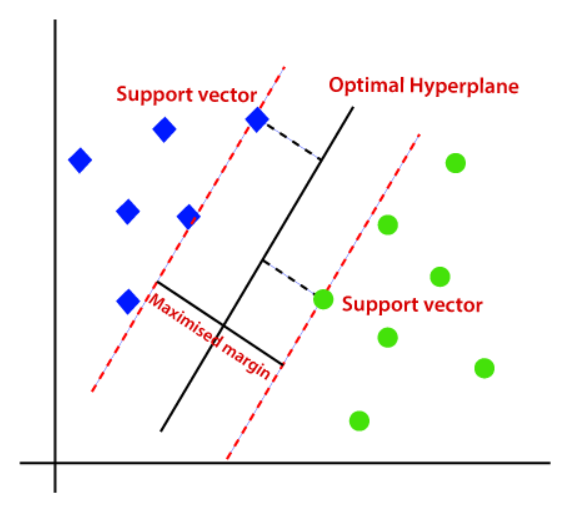

Here we can see the gap that separates the two categories and in the middle is the hyperplane. The data points that touch the edges of the margin are known as support vectors.

### Project - Import Libraries and Data

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# the dataset used is the famours Iris dataset which is a perfect showcase of the use of SVM
# this famous dataset is stored in seabron
# import the dataset from the seaborn library
iris = sns.load_dataset('iris')
iris.head()

### Project - Exploratory Data Analysis

In [ ]:
# which flower species appears to be the most separable
# create a pairplot using seaborn of the dataset with breakdown by species
sns.pairplot(data=iris, hue='species')

In [ ]:
# from the pair plot we can see that setosa is the most separable species
# investigate this species further
setosa = iris[iris['species']=='setosa']
plt.figure(figsize=[15,8])
sns.kdeplot(data=setosa, x='sepal_width', y='sepal_length', cmap='plasma', shade=True)

### Project - Train Test Split and Standardisation

It is important to note here that the optimal hyperplane is influenced by the scale of the input features and it is neccessary for the input features to be scaled before training the model. However, the iris data is all of the same scale so it does not have to be done. But, for good practice these steps will be included in the preprocessing of the data anyway.

In [ ]:
# define the features and the target label for the train test split
# perform train test split on the data
X = iris.drop('species', axis=1).values
y = iris['species'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# create an instance of StandardScaler
# train the scaler on the training data
# transform the features of both the training and testing sets
scaler = StandardScaler()
scaler.fit(x_train, y_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Project - SVM Model Creation and Evaluation

In [ ]:
# create an instance of SVC
# train the model
# make predictions
svm = SVC()
svm.fit(x_train, y_train)
yhat = svm.predict(x_test)
yhat

In [ ]:
# evaluate the model with a classification report and a confusion matrix
print(confusion_matrix(y_test, yhat))
print('\n')
print(classification_report(y_test, yhat))

### Project - Searching for the Optimal Hyperparameters using Grid Search and Evaluating Grid Search Model

How this works is creating a grid of parameters and testing different values for these parameters until the model finds the optimal values for the best performance of the model. The grid of parameters is input as a dictionary with the keys as the parameters and the values as the list of settings to be tested.

In [ ]:
# need to make a variable to enter as a parameter grid in GridSearch which will take the form of a dictionary
# the parameters addressed in the following variable are the C and gamma parameters
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [ ]:
# create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(x_train, y_train)

In [ ]:
# use the trained grid object to make predictions
yhat = grid.predict(x_test)
yhat

In [ ]:
# evaluate the model with a classification report and a confusion matrix
print(confusion_matrix(y_test, yhat))
print('\n')
print(classification_report(y_test, yhat))

Utilising grid search here allowed the model performance to increase. Note that due to the small size of the dataset the increase in performance is not significant. However, with larger datasets the increase in performance will be more apparent.

## K Means Clustering

### Info

K means clustering is an unsupervised learning algorithm meaning there will be no target labels in the training data when fitting the model. The algorithm will attempt to group similar clusters together so there are distinct groups. This is done by finding the centroid through taking the mean vector of all the data points in that cluster. New data points are then assigned to the cluster that has the closest centroid.

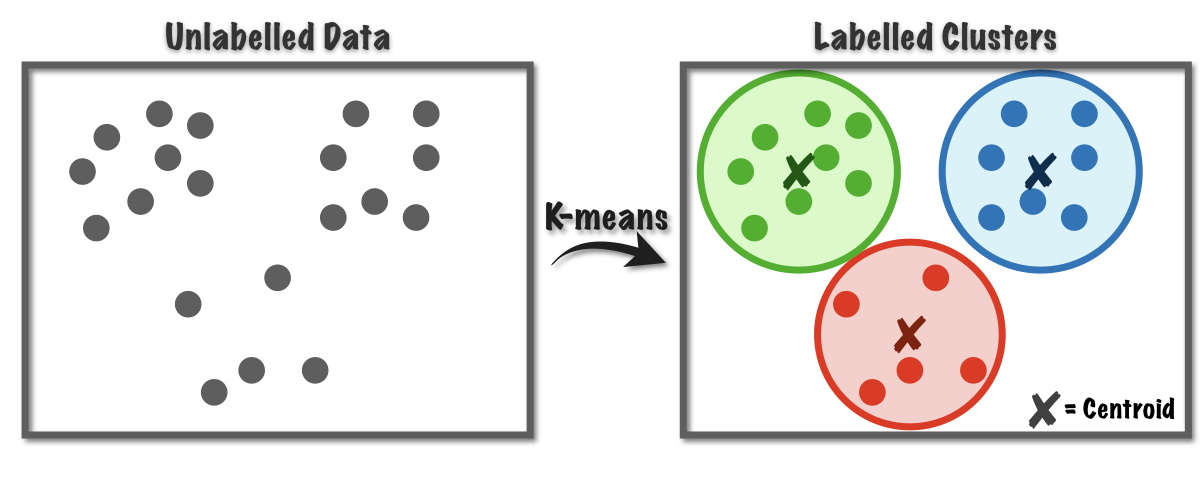

The algorithm will begin by randomly assigning all data points into K number of clusters, the cluster centroids are then computed. Since the values were assigned into random clusters all centroids are around the middle of the graph, the algorithm is then run again, assigning data points to the nearest cluster; moreover, this process is done for many iterations until the centroids stop moving.

An example of the iterative process is shown below:

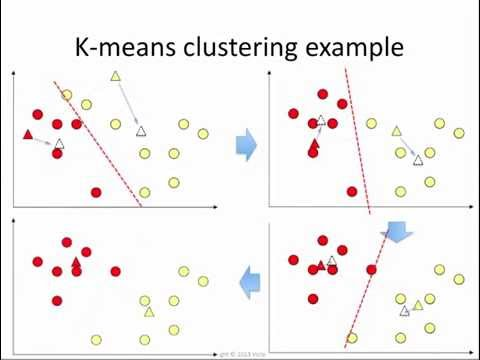

There is no absolute answer for what number of clusters to look for in the data, that may come down to domain knowledge. However, there is a method where you iterate through numbers of k and find the lowest value for k which generates the lowest sum of squared error (SSE). This has been termed the elbow method.

### Project - Import Libraries and Data

The dataset contains performance metrics and other details on schools. The goal of this project will be to deploy a K Means Clustering algorithm to cluster Universities into two groups, Private and Public.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# import data
df = pd.read_csv('K_Means_Project_Data', index_col='Unnamed: 0')
df.head()

### Project - Exploratory Data Analysis

In [ ]:
# inspect the relationship between graduation rate and accomodation costs
plt.figure(figsize=[15,8])
sns.scatterplot(data=df, x='Grad.Rate', y='Room.Board', hue='Private')

In [ ]:
# inspect the number of fulltime undergraduates vs out-of-state tuition
# provide breakdown by whether it is a private school or not
plt.figure(figsize=[15,8])
sns.scatterplot(data=df, x='Outstate', y='F.Undergrad', hue='Private')
plt.legend()

In [ ]:
# visualise the distribution of out of state tuition based on private or not.
grid = sns.FacetGrid(df, hue='Private', height=6, aspect=2)
grid.map(sns.histplot, 'Outstate', bins=20, alpha=0.7)
plt.legend()

In [ ]:
# now look at the distribution of graduation rate
# breakdown by whether the university is private or not
grid = sns.FacetGrid(df, hue='Private', height=6, aspect=2)
grid.map(sns.histplot, 'Grad.Rate', bins=20, alpha=0.7)
plt.legend()

In [ ]:
# notice there is data for a graduation rate higher than 100%...find this data
print(df[df['Grad.Rate'] > 100].index[0])

In [ ]:
# change it so that the graduation rate is 100% so the data makes sense
df.loc['Cazenovia College', 'Grad.Rate'] = 100

### Project - Scaling

Important to note here that the data does not need to be split into training data and test data. We do not need to reserve testing data because K Means Clustering is an unsupervised learning algorithm so the true value of the target label is unknown. Furthermore, the data should be scaled because it works on distance from the centroid, so mixing scales would affect this.

In [ ]:
# check that all the data is numeric
df.select_dtypes(include='object').columns

In [ ]:
# private is the only variable that is non-numeric and it is the one we are predicting
# NOTE we would not normally have this data due to unsupervised learning algorithm
# how ever for the sake of testing accuracy we have this data
# create variables to scale data on
X = df.drop('Private', axis=1)
y = pd.get_dummies(df['Private'], drop_first=True)

In [ ]:
# train the scaler and transform the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

### Project - K Means Cluster Creation

In [ ]:
# create an instance of KMeans
# use a cluster number of 2 because we are trying to predict private or not
# note you do not enter y values when fitting the model...unsupervised learning
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)

In [ ]:
# find the cluster centre vectors
kmeans.cluster_centers_

In [ ]:
# look at the cluster labels for each data entry
yhat = kmeans.labels_
yhat

### Project - Evaluation

There is no perfect way to evaluate clustering if you do not have the labels. However, for the purpose of this project the labels are known so accuracy can be measured.

In [ ]:
# evaluate the model with a classification report and a confusion matrix
print(confusion_matrix(y, yhat))
print('\n')
print(classification_report(y, yhat))

## Natural Language Processing

### Info

Natrual Language Processing allows computers to interact with the human language by programming them to process and analyse large amounts of text data. NLP has many use cases when you are dealing with unstructured text data. The general process includes:
- Compiling text documents
- Featurizing the text documents
- Comparing the features between documents

A common way to featurize documents is to conduct a work count. All the unique words are indentified and each occurence is counted across all the documents in the data. In essence you transform the documents into a vectorized word count.

An example of this with three text documents is shown below:

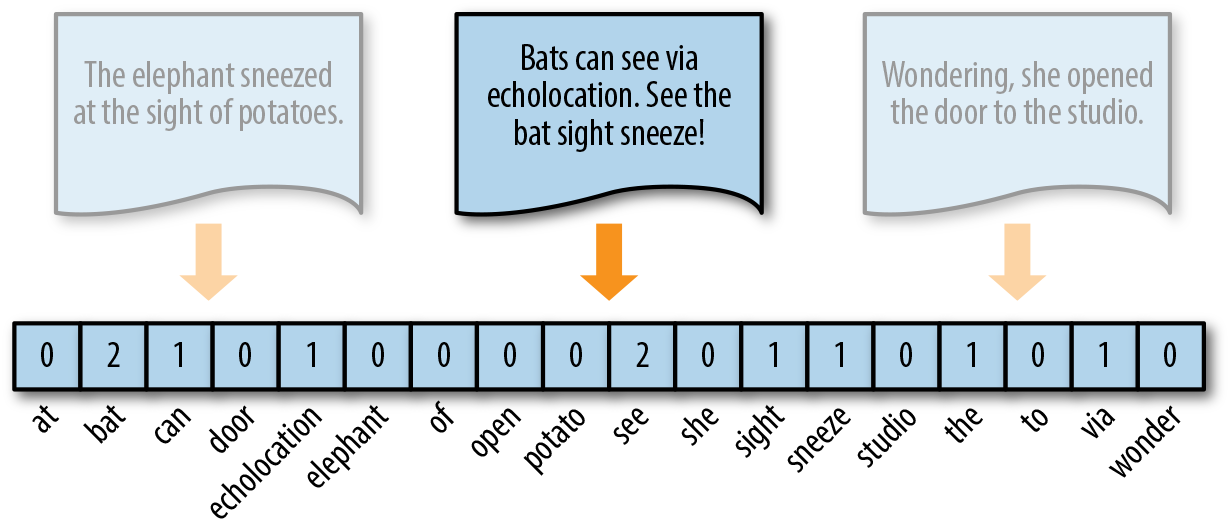

A document represented as a vector of word counts is called a "Bag of Words". Because a vectorized word count is obtained from each document, you can compare similarity between documents using cosine similarity between vectors.

Improvement on "Bag of Words" can be done by adjusting word counts based on their frequency across all documents in the data. TF-IDF (Term Frequency - Inverse Document Frequency) is used to do this and indicates the importance of a particular word across all documents in the data.

TF-IDF formula is shown below:

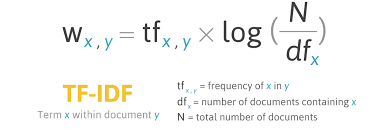

### Project - Import Libraries and Data

The data contains reviews on businesses hosted on Yelp. Each row of the dataset is a review on a particular business from a single user. The project will use Natural Language Processing (NLP) to classify reviews from 1 to 5 star ratings.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# import the data
df = pd.read_csv('NLP_Project_Data.csv')
df.head()

### Project - Exploratory Data Analysis

In [ ]:
# does the number of words in a review indicate star rating
# create a text length column for this which shows number of words in review
df['text length'] = df['text'].apply(lambda x: len(x.split()))

In [ ]:
# look at text length across all star ratings
grid = sns.FacetGrid(df, col='stars')
grid.map(sns.histplot, 'text length', bins=10)

In [ ]:
# visualise text length for each star category with a box plot
plt.figure(figsize=[15,8])
sns.boxplot(data=df, x='stars', y='text length')

In [ ]:
# have a look at to see how many occurrences there are of each rating
plt.figure(figsize=[15,8])
sns.countplot(data=df, x='stars')

In [ ]:
# group by star ratings and look at the mean across all other numeric columns
df.groupby('stars').mean()

In [ ]:
# look at the correlation between variables of the groupby above
df.groupby('stars').mean().corr()

In [ ]:
# visualise the correlation in a heatmap
plt.figure(figsize=[15,8])
sns.heatmap(df.groupby('stars').mean().corr(), cmap='coolwarm', annot=True)

### Project - Train Test Split and Vectorization

In [ ]:
# set variables to conduct a train test split on
# only need the text as X and star ratings a y
X = df['text']
y = df['stars']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# now to vectorize each body of text
# create a CountVectorizer object
# fit on the training data and transform the training data
cv = CountVectorizer()
cv.fit(x_train)
x_train = cv.transform(x_train)
x_test = cv.transform(x_test)

print(x_train.shape)
print(x_test.shape)

### Project - Model Creation, Predictions and Evaluation (No TF-IDF)

It is important to note here that two models will be created. The first model will not utilise Term Frequency - Inverse Document Frequency (TF-IDF) and the second model will; furthermore, both these models will compared on accuracy to see the effect of (TF-IDF).

In [ ]:
# instantiate MultinomialNB object
# train the model using the training data
# create prediction using the test data
nb = MultinomialNB()
nb.fit(x_train, y_train)
yhat = nb.predict(x_test)

In [ ]:
# evaluate the model with a classification report and a confusion matrix
print(confusion_matrix(y_test, yhat))
print('\n')
print(classification_report(y_test, yhat))

### Project - Model Creation, Predictions and Evaluation (TF-IDF)

Now we will create a model and use the TF-IDF function to determine the importance of individual words across all the bodies of text. Moreover, there are multiple transformations we must conduct so we will utilise a pipleine to speed up the process.

In [ ]:
# re-split the data because we already transformed it in the previous model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# create a pipeline that does the following:
# vectorizes the data
# applies Tfidf Transformer to the data
# then conducts a Multinomial Naive Bayes transformation
input = [
    ('count_vectorizer', CountVectorizer()),
    ('tf-idf', TfidfTransformer()),
    ('naive_bayes', MultinomialNB())
]

pipe = Pipeline(input)
pipe

In [ ]:
# train the pipeline with the training data
# create predictions
pipe.fit(x_train, y_train)
yhat = pipe.predict(x_test)

In [ ]:
# evaluate the model with a classification report and a confusion matrix
print(confusion_matrix(y_test, yhat))
print('\n')
print(classification_report(y_test, yhat))

Note you could create a custom analyzer or change the machine learning classification model to a different classifer than NaiveBayes to try and improve this model.